In [2]:
import torch

c:\Users\huiyi\anaconda3\envs\pytorch\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
samples = torch.rand(1, 1, 1, 8, 8)

tensor([[[[[0.9868, 0.8217, 0.6410, 0.2025, 0.3875, 0.4462, 0.2816, 0.6887],
           [0.7010, 0.9036, 0.1071, 0.5519, 0.7408, 0.6928, 0.8463, 0.6535],
           [0.6741, 0.1628, 0.6923, 0.3696, 0.2089, 0.8901, 0.3107, 0.6635],
           [0.9029, 0.2699, 0.5747, 0.2151, 0.4810, 0.0304, 0.8480, 0.0392],
           [0.8355, 0.1600, 0.6327, 0.0902, 0.6375, 0.6701, 0.2490, 0.8698],
           [0.6189, 0.6614, 0.1239, 0.4324, 0.3279, 0.6343, 0.0684, 0.4341],
           [0.5525, 0.9742, 0.2323, 0.9196, 0.5311, 0.9893, 0.9170, 0.3168],
           [0.0296, 0.3460, 0.2584, 0.5945, 0.8642, 0.8489, 0.3520, 0.8388]]]]])

In [8]:
mask = torch.BoolTensor(8, 8)
mask[1,1] = True



tensor([[False, False, False, False, False, False, False, False],
        [False,  True, False, False, False, False, False, False],
        [False, False, False, False, False, False, False, False],
        [False, False, False, False, False, False, False, False],
        [False, False, False, False, False, False, False, False],
        [False, False, False, False, False, False, False, False],
        [False, False, False, False, False, False, False, False],
        [False, False, False, False, False, False, False, False]])

In [25]:
mask2 = torch.ones(8,8, dtype=torch.bool)

mask2[1,1] = False

mask2

tensor([[ True,  True,  True,  True,  True,  True,  True,  True],
        [ True, False,  True,  True,  True,  True,  True,  True],
        [ True,  True,  True,  True,  True,  True,  True,  True],
        [ True,  True,  True,  True,  True,  True,  True,  True],
        [ True,  True,  True,  True,  True,  True,  True,  True],
        [ True,  True,  True,  True,  True,  True,  True,  True],
        [ True,  True,  True,  True,  True,  True,  True,  True],
        [ True,  True,  True,  True,  True,  True,  True,  True]])

In [11]:
samples[:,:,:, mask] = 100000
samples

tensor([[[[[9.8675e-01, 8.2172e-01, 6.4099e-01, 2.0253e-01, 3.8753e-01,
            4.4624e-01, 2.8159e-01, 6.8871e-01],
           [7.0105e-01, 1.0000e+05, 1.0707e-01, 5.5191e-01, 7.4076e-01,
            6.9285e-01, 8.4629e-01, 6.5346e-01],
           [6.7410e-01, 1.6282e-01, 6.9231e-01, 3.6964e-01, 2.0889e-01,
            8.9010e-01, 3.1074e-01, 6.6351e-01],
           [9.0294e-01, 2.6991e-01, 5.7470e-01, 2.1511e-01, 4.8099e-01,
            3.0420e-02, 8.4798e-01, 3.9207e-02],
           [8.3553e-01, 1.5999e-01, 6.3265e-01, 9.0213e-02, 6.3754e-01,
            6.7012e-01, 2.4902e-01, 8.6977e-01],
           [6.1888e-01, 6.6136e-01, 1.2394e-01, 4.3236e-01, 3.2787e-01,
            6.3433e-01, 6.8392e-02, 4.3410e-01],
           [5.5254e-01, 9.7424e-01, 2.3225e-01, 9.1964e-01, 5.3113e-01,
            9.8935e-01, 9.1698e-01, 3.1681e-01],
           [2.9566e-02, 3.4599e-01, 2.5843e-01, 5.9450e-01, 8.6417e-01,
            8.4893e-01, 3.5201e-01, 8.3878e-01]]]]])

In [12]:
x_mod = samples

In [14]:
x_mod2 = x_mod.view(-1, 1, 8 ,8)

In [16]:
x_mod2.shape

torch.Size([1, 1, 8, 8])

In [19]:
x_mod2[..., mask]

torch.Size([1, 1, 1])

# picture generating

In [19]:
import numpy as np
import csv
import scipy
from sklearn.model_selection import train_test_split



tlist = scipy.io.loadmat('Heston' + '_tlist.mat')
tlist = tlist['tlist'] # note that they are 2D array 
tlist = tlist.reshape((-1))
# Klist = scipy.io.loadmat('msft_Klist.mat')
Klist = scipy.io.loadmat('Heston' + '_Klist.mat')
Klist = Klist['Klist'] # note that they are 2D array
Klist = Klist.reshape((-1))
totalvarsurface = scipy.io.loadmat('HestonIVSgrid_NI.mat')
# totalvarsurface = totalvarsurface['totalvarsurface']
totalvarsurface = totalvarsurface['HestonIVS2D']
IVStrain, IVStest = train_test_split(totalvarsurface, test_size = 0.2, random_state = 42)

In [71]:
surfivs = IVStrain[0:6]
print(surfivs.shape)
surfivspred = surfivs.copy() * 1.2
surfivspred[1,1] = surfivs[1,1] * 1.56
surfivspred.shape

(6, 8, 8)


(6, 8, 8)

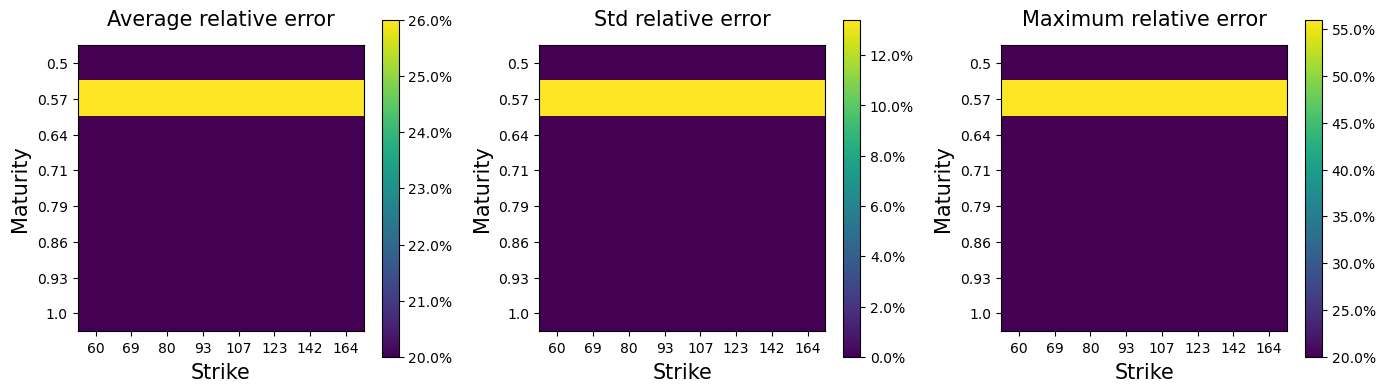

In [79]:
inpainting_error(tlist, Klist, surfivs, surfivspred, plotname='HestoninpaintingErrors')

In [78]:
def inpainting_error(surfivs, surfivspred, Klist, tlist,  plotname='HestoninpaintingErrors'):
    """surfivs shape (batch_size, image_size_y, image_size_x)"""
    from matplotlib.ticker import FormatStrFormatter, StrMethodFormatter
    import matplotlib.pyplot as plt
    import matplotlib.ticker as mtick

    plt.figure(1,figsize=(14,4))
    ax=plt.subplot(1,3,1)
    err = np.mean(100 * np.abs((surfivspred - surfivs)/ surfivs), axis =0) 
    plt.title("Average relative error",fontsize=15,y=1.04)
    plt.imshow(err.reshape(len(tlist),len(Klist)))
    plt.colorbar(format=mtick.PercentFormatter())

    ax.set_xticks(np.linspace(0,len(Klist)-1,len(Klist)))
    ax.set_xticklabels(Klist.astype('int'))

    # ax.set_yticks(np.linspace(0,len(tlist)-1,len(tlist)))
    ax.set_yticks(np.linspace(0,len(tlist)-1,len(tlist)))
    ax.set_yticklabels([str(round(t,2)) for t in tlist])
    # ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    # ax.yaxis.set_major_formatter('{x:9<5.1f}')
    # plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.2f}'))
    plt.xlabel("Strike",fontsize=15,labelpad=5)
    plt.ylabel("Maturity",fontsize=15,labelpad=5)

    ax=plt.subplot(1,3,2)
    err = 100*np.std(np.abs((surfivspred-surfivs)/surfivs),axis = 0)
    plt.title("Std relative error",fontsize=15,y=1.04)
    plt.imshow(err.reshape(len(tlist),len(Klist)))
    plt.colorbar(format=mtick.PercentFormatter())
    ax.set_xticks(np.linspace(0,len(Klist)-1,len(Klist)))
    ax.set_xticklabels(Klist.astype('int'))
    ax.set_yticks(np.linspace(0,len(tlist)-1,len(tlist)))
    ax.set_yticklabels([str(round(t,2)) for t in tlist])
    plt.xlabel("Strike",fontsize=15,labelpad=5)
    plt.ylabel("Maturity",fontsize=15,labelpad=5)

    ax=plt.subplot(1,3,3)
    err = 100*np.max(np.abs((surfivspred-surfivs)/surfivs),axis = 0)
    plt.title("Maximum relative error",fontsize=15,y=1.04)
    plt.imshow(err.reshape(len(tlist),len(Klist)))
    plt.colorbar(format=mtick.PercentFormatter())
    ax.set_xticks(np.linspace(0,len(Klist)-1,len(Klist)))
    ax.set_xticklabels(Klist.astype('int'))
    ax.set_yticks(np.linspace(0,len(tlist)-1,len(tlist)))
    ax.set_yticklabels([str(round(t,2)) for t in tlist])
    plt.xlabel("Strike",fontsize=15,labelpad=5)
    plt.ylabel("Maturity",fontsize=15,labelpad=5)
    plt.tight_layout()
    plt.savefig(plotname+ '.png', dpi=300)
    plt.show()



In [57]:
Klist

array([ 60.65306597,  69.96725374,  80.7117747 ,  93.10627797,
       107.40414307, 123.89765975, 142.92400324, 164.87212707])

In [ ]:
strikes_dim=len(Klist)
maturities_dim=len(tlist)
strikeslabel=np.round(np.linspace(strikes[0],strikes[-1],8),1)
maturitieslabel=np.array([0.1,0.2, 0.6, 1.5,1.8])
##### AVERAGE VALUES #######
X_sample = xinversetransform(x_test_transform)
y_sample = y_test_transform

prediction=[xinversetransform(modelGEN.predict(y_sample[i].reshape(1,5))[0]) for i in range(len(y_sample))]
plt.figure(1,figsize=(14,4))
ax=plt.subplot(1,3,1)
err = np.mean(100*np.abs((X_sample-prediction)/X_sample),axis = 0)
plt.title("Average relative error",fontsize=15,y=1.04)
plt.imshow(err.reshape(maturities_dim,strikes_dim))
plt.colorbar(format=mtick.PercentFormatter())

ax.set_xticks(np.linspace(0,len(strikes)-1,len(strikes)))
ax.set_xticklabels(strikes)
ax.set_yticks(np.linspace(0,len(maturities)-1,len(maturities)))
ax.set_yticklabels(maturities)
plt.xlabel("Strike",fontsize=15,labelpad=5)
plt.ylabel("Maturity",fontsize=15,labelpad=5)